# Сжатие картинок с помощью SVD разложения
В этом задании нужно сделать сжатие изображения, сжатие с потерями. Для этого мы используем SVD разложение.

Примерный порядок действий:
1) Найти любую картинку,
2) Прочитать её с помощью библиотеки PIL
3) Преобразовать в numpy массив
4) Применить SVD к матрице - обязательно прочитайте справку по этой функции `np.linalg.svd`

**Примечание**: Цветная картинка представляет собой трёхканальное изображение RBG, поэтому напрямую SVD разложение применить не получится. Либо вы преобразуете изображение в одноканальное (градации серого), усредняя все три канала. Либо делаете SVD для всех трёх каналов в отдельности.

5) Далее оставляете небольшое количество сингулярных значений - 1, 2, 10, 30, 100. И выводите результат в виде получившейся картинки - чем больше сингулярных чисел, тем ближе приближённая матрица к исходной.

6) Сравните количество байт, необходимых для хранения исходной картинки и сжатой версии.

Ниже представлены основные функции и библиотеки, которые вам понадобятся.

Задание оформляете в виде блокнота jupyter. Особо понравившиеся картинки можно сохранить отдельно на диск, но мне удобнее чтобы они присутствовали в самом jupyter блокноте.

In [7]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

img = Image.open('panda.jpg')
w, h = img.size
img = img.resize((w//4, h//4)) # можно не делать .resize(())

# x = np.array(img, dtype=np.float32) # преобразование из PIL в numpy array
# U, S, V = np.linalg.svd(X, full_matrices=False) # разложение SVD
# # обратное преобразование из numpy array в PIL с сохранение изображения на диск
# Image.fromarray(np.asarray(Y_r, dtype=np.uint8)).save(f'{r}.png')

In [8]:
img_array = np.array(img)

In [9]:
gray_img = np.mean(img_array, axis=2)

In [10]:
U, s, Vh = np.linalg.svd(gray_img)

In [11]:
singular_values = [1, 2, 10, 30, 100]

for k in singular_values:
    compressed_img = U[:, :k] @ np.diag(s[:k]) @ Vh[:k, :]
    compressed_img = compressed_img.astype(np.uint8)
    
    Image.fromarray(compressed_img).save(f'compressed_{k}.jpg')

In [14]:
import os


original_size = os.path.getsize('panda.jpg')
print(f'Original image size: {original_size} bytes')

for k in singular_values:
    compressed_size = os.path.getsize(f'compressed_{k}.jpg')
    print(f'Compressed image size (k={k}): {compressed_size} bytes')

Original image size: 95132 bytes
Compressed image size (k=1): 2170 bytes
Compressed image size (k=2): 2567 bytes
Compressed image size (k=10): 4153 bytes
Compressed image size (k=30): 5369 bytes
Compressed image size (k=100): 5350 bytes


К =1


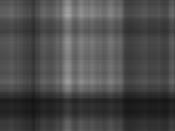

In [19]:
from IPython.display import Image
print('К =1')
Image("compressed_1.jpg", width=320, height=240) 

"[k" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
